In [10]:
import os
import pandas as pd
import numpy as np
from skimage import color
from skimage import io
import matplotlib.pyplot as plt

from string import maketrans

In [100]:
data_dir = "./datas/meteorite_mineral_mapper/dataset_1_opaques/"
translate_table = str.maketrans({'rutile':'TiO2'})

ValueError: string keys in translate table must be of length 1

In [99]:
standard_dirs = list(filter(lambda d: d[:14] == "standards_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
mask_dirs = list(filter(lambda d: d[:4] != "obj1" and d[:4] != "obj2" and d[-8:]=="mask.tif",[d.tranlsate(translate_table) for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj1_dirs = list(filter(lambda d: d[:9] == "obj1_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj2_dirs = list(filter(lambda d: d[:9] == "obj2_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))

AttributeError: 'str' object has no attribute 'tranlsate'

In [98]:
standards = {}
for s in standard_dirs:
    tmp = s.split(".")[0].split("_")[-1]
    standards[tmp] = io.imread(data_dir+s)
masks = {}
for m in mask_dirs:
    masks[m.split("std")[0].split("_")[0].split("-")[0]] = io.imread(data_dir+m)
obj1 = {}
for o in obj1_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj1[tmp] = io.imread(data_dir+o)

obj2 = {}
for o in obj2_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj2[tmp] = io.imread(data_dir+o)

In [34]:
def show(array, index):
    plt.imshow(array[index], cmap="gray")

In [39]:
masks.keys()

dict_keys(['NiS', 'Ni', 'SCOlv', 'FeS', 'Fe', 'CaTiO3', 'Fe3O4', 'rutile'])

In [40]:
standards.keys()

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [92]:
def mask(mask, standard):
    t = np.zeros_like(standard)
    for i in range(256):
        for j in range(512):
            if (mask[i][j]):
                t[i][j] = standard[i][j]
    return t

mask_maps = {}
for k in masks.keys():
    mask_maps[k] = {}
    for s in standards.keys():
        if s in k:
            mask_maps[k][s] = mask(masks[k], standards[s])
mask_maps

{'NiS': {'Ni': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'S': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'Ni': {'Ni': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'SCOlv': {'S': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'FeS': {'S': arr

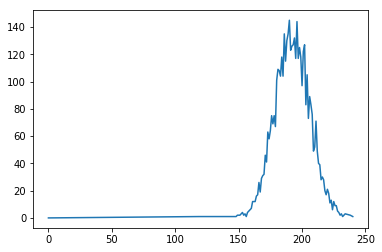

In [89]:
y = np.bincount(mask_maps['NiS']['Ni'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = [0] + xx[1:]
yy = [0] + yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

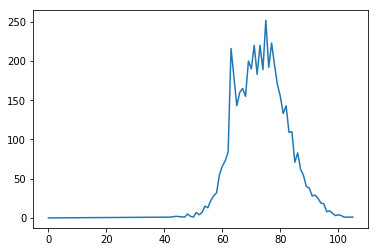

In [90]:
y = np.bincount(mask_maps['NiS']['S'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = [0] + xx[1:]
yy = [0] + yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

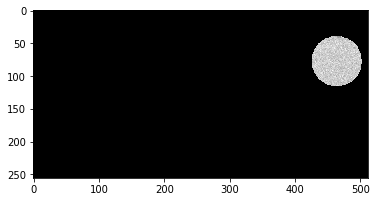

In [94]:
plt.imshow(mask(masks['NiS'], standards['Ni']), cmap="gray")